<a href="https://colab.research.google.com/github/MarcosLopes99/techchallengefase1/blob/main/TechChallenge1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tech Challenge - Fase 1**

Grupo 14

Daniel Gurgel figueiredo Suárez - RM354088

Ricardo Báfica Pontes - RM353866

Marcelo Henriques da Fonseca - RM353865

Marcos Lopes da Silva Junior - RM353763

# Carregando os dados

In [37]:
import pandas as pd

# Lendo o arquivo CSV e transformando em um data frame
df = pd.read_csv('insurance.csv')

# Conhecendo os dados

In [38]:
# (Linhas, colunas) do data frame
df.shape

(1338, 7)

In [39]:
# Visualização das 5 primeiras entradas
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [40]:
# Visualização de estatísticas descritivas
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [41]:
# Informações gerais dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Podemos ver que temos alguns dados categóricos como "sex", "smoker" e "region". Se compararmos com o shape dos dados (1338 linhas, 7 colunas), também podemos notar que não existem dados nulos em nenhuma coluna.

## Verificando dados categóricos

In [42]:
# Mostrando as regiões que temos em nossos dados
set(df.region)

{'northeast', 'northwest', 'southeast', 'southwest'}

In [43]:
# Verificando quantas vezes cada uma delas aparece
df.region.value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

Podemos observar que a região "southeast" possui uma representação um pouco maior dentro da nossa base de dados se comparado as outras regiões.

In [44]:
# Verificando quantas vezes cada sexo aparece
df["sex"].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

Temos uma disbribuição parecida de homens e mulheres, com um pouco mais de homens.

In [45]:
# Verificando a quantidade de fumantes e não-fumantes
df["smoker"].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

Temos muito mais não-fumantes do que fumantes.

## Verificando a existência de nulos

<Axes: >

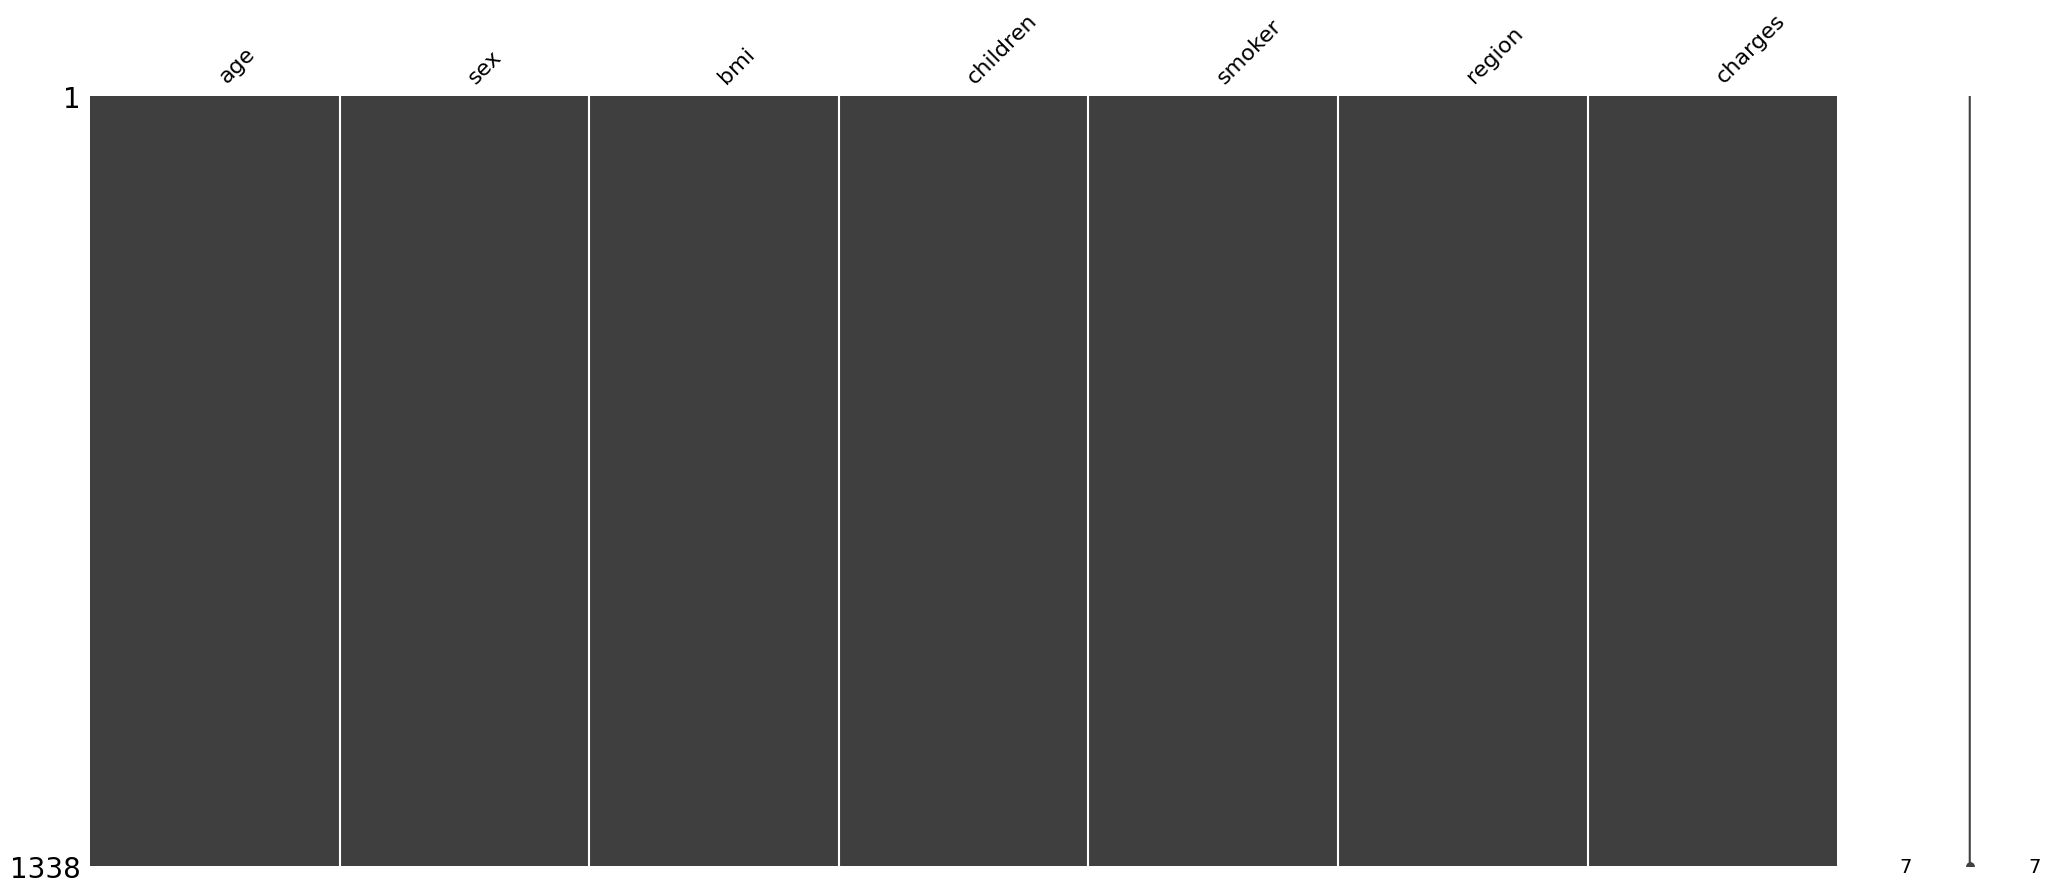

In [46]:
import missingno as msno

msno.matrix(df)

In [47]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Não há dados nulos.

## Histogramas

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

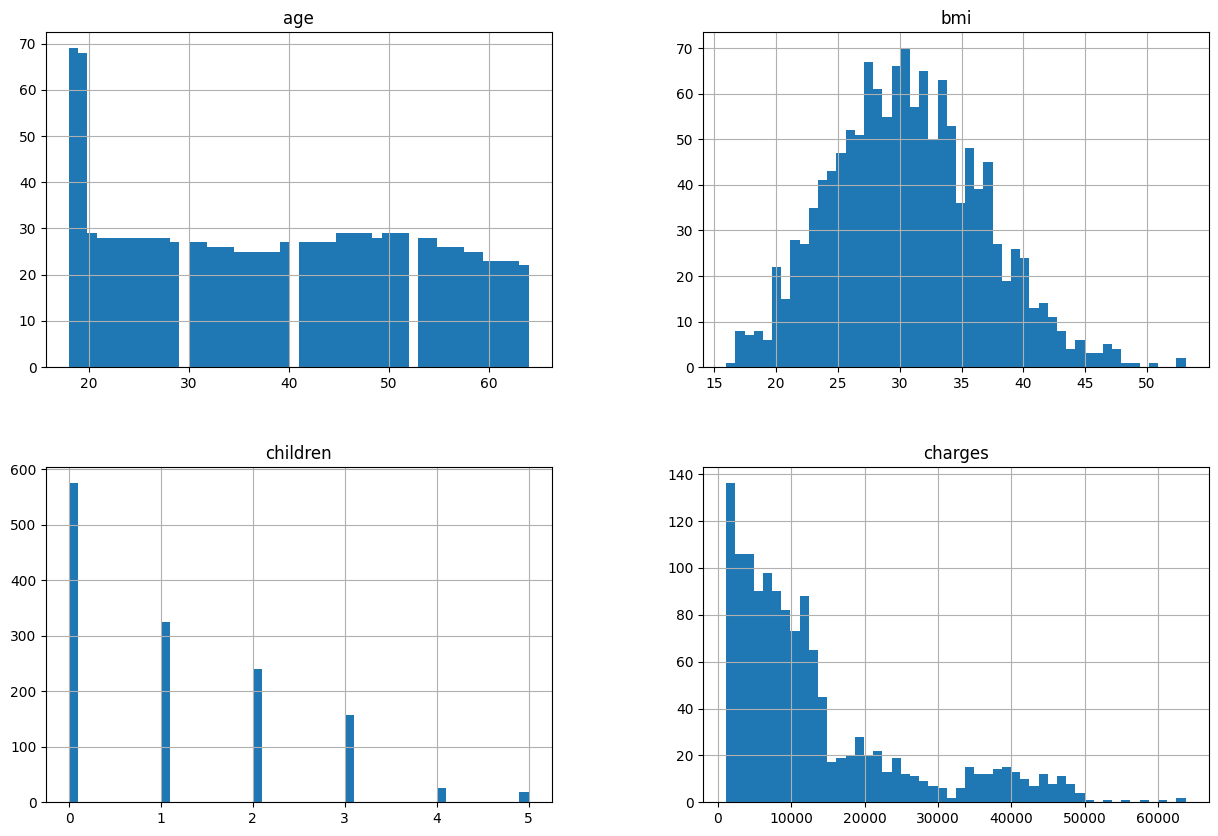

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt

# Usando histogramas para termos uma ideia de como os dados estão distribuidos
df.hist(bins=50, figsize=(15,10))

Em "age" podemos verificar que exite uma representação muito maior de pessoas jovens em seus 18 e 19.

Em "bmi" podemos verificar que a maior parte das pessoas se encontra em um IMC médio.

Em "children" podemos verificar que há uma maior representação em nossos dados de pessoas com nenhum ou menos filhos.

Em "charges" podem ver também que em nossos dados há uma maior representação de valores abaixo de 15.000.

## Boxplot

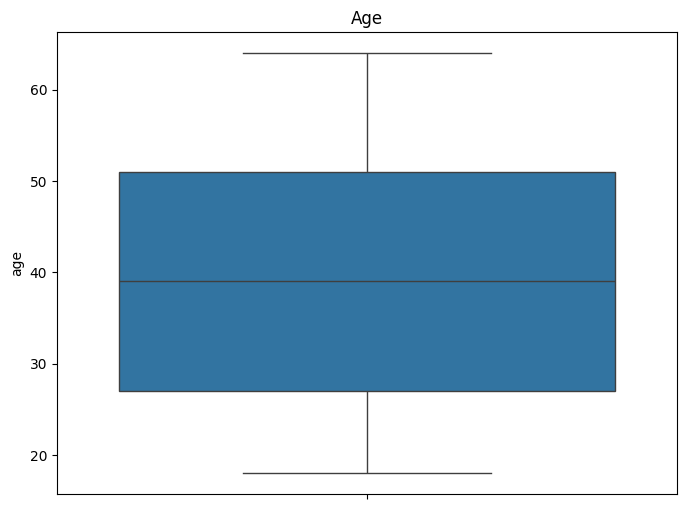

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(data=df["age"])
plt.title('Age')
plt.show()

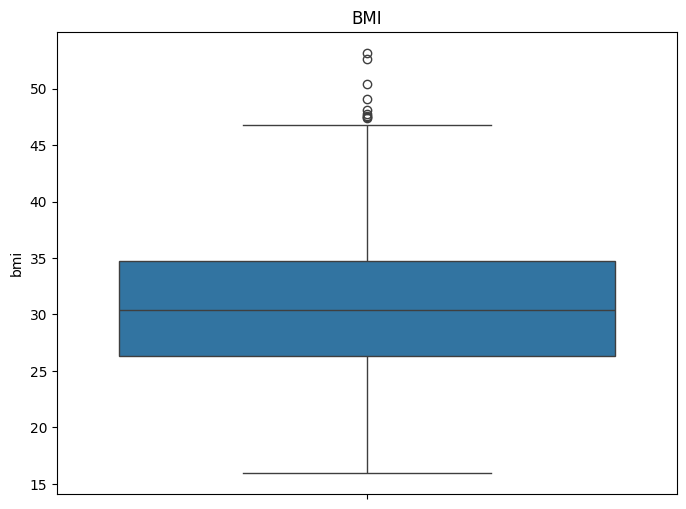

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(data=df["bmi"])
plt.title('BMI')
plt.show()

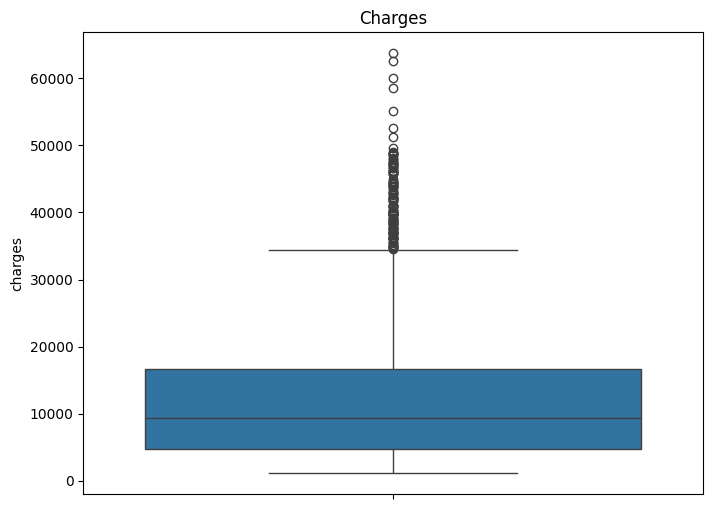

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(data=df["charges"])
plt.title('Charges')
plt.show()

## Correlações

### Matriz de correlação


Aqui usamos da matriz de correlação para verificar se existe correlação entre os dados.

<Axes: >

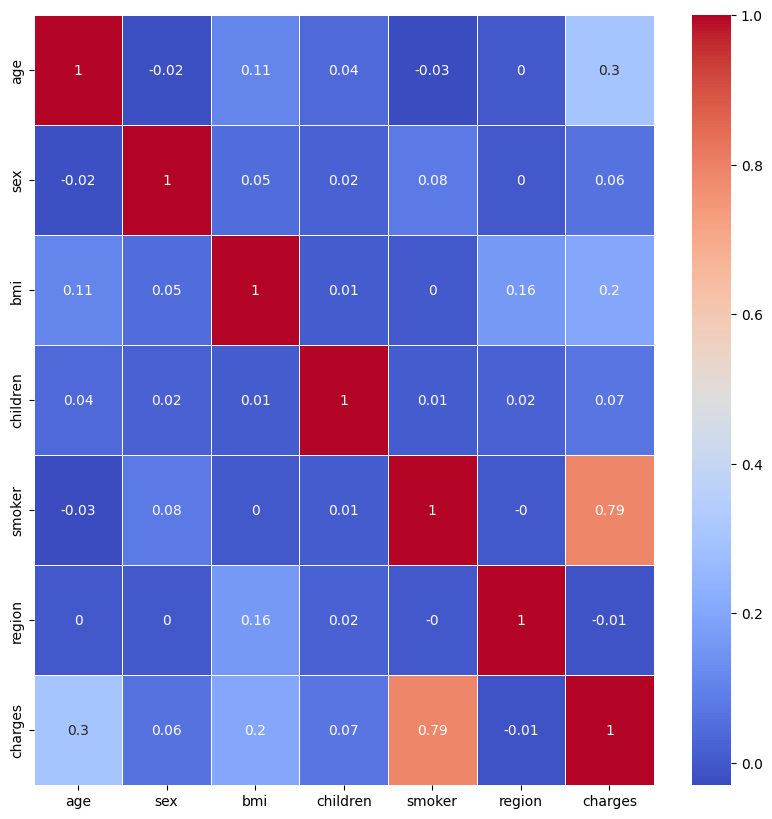

In [52]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Aplicando LabelEncoder em uma cópia do data frame para conseguirmor visualizar os dados categóricos na matriz
label_encoder = LabelEncoder()

df_label_encoded = df

df_label_encoded['sex'] = label_encoder.fit_transform(df['sex'])
df_label_encoded['region'] = label_encoder.fit_transform(df['region'])
df_label_encoded['smoker'] = label_encoder.fit_transform(df['smoker'])


# Criando e mostrando a matriz
numeric_columns = df_label_encoded.select_dtypes(include='number')

correlation_matrix = numeric_columns.corr().round(2)

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax, cmap="coolwarm")

Olhando a matriz podemos observar que o valor das despesas médicas tem uma alta correlação com a pessoa ser fumante ou não.

### Correlação entre fumantes e despesas

Abaixo plotamos dois gráficos para visualizar a distribuição de despesas entre fumantes e não-fumantes.

Text(0.5, 1.0, 'Despesas para não-fumantes')

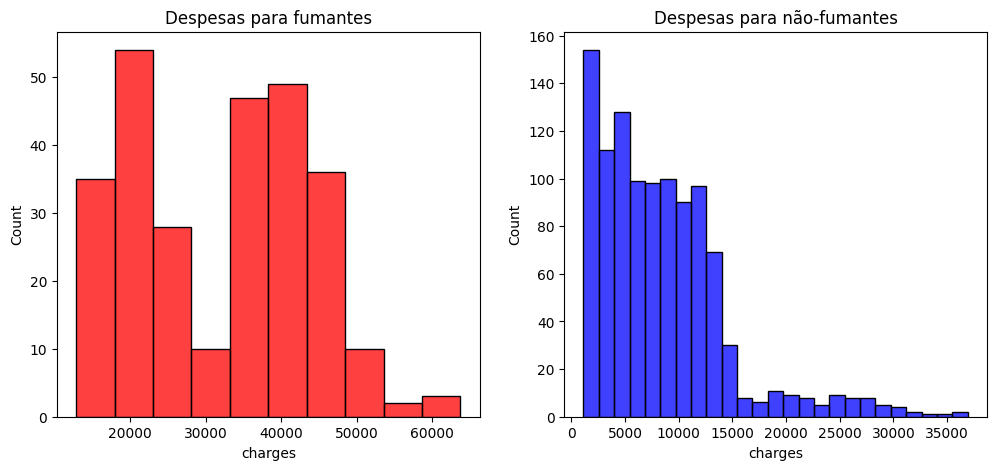

In [53]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.histplot(df_label_encoded[(df_label_encoded.smoker == 1)]["charges"],color='r',ax=ax)
ax.set_title('Despesas para fumantes')

ax=f.add_subplot(122)
sns.histplot(df_label_encoded[(df_label_encoded.smoker == 0)]['charges'],color='b',ax=ax)
ax.set_title('Despesas para não-fumantes')

Podemos verificar que fumantes, em média, tem muito mais gastos com despesas médicas.

# Preparando os dados

## Feature Scaling

Agora aplicamos feature scaling em certas colunas do nosso data frame para tratar os dados categóricos.

Como a dimensionalidade original não é tão alta e como não há uma ordem significativa entre as categorias optamos pelo One Hot Encoder.

In [54]:
from sklearn.preprocessing import OneHotEncoder

colunas = ['sex', 'smoker', 'region']

encoder = OneHotEncoder(sparse=False)

encoded_cols = encoder.fit_transform(df[colunas])

encoded_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(colunas))

df_encoded = pd.concat([df, encoded_df], axis=1)

colunas_drop = ['sex', 'smoker', 'region']

# Drop das colunas especificadas
df_encoded = df_encoded.drop(columns=colunas_drop)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [55]:
# Mostrando nossos dados transformados
df_encoded.head()

,age,bmi,children,charges,sex_0,sex_1,smoker_0,smoker_1,region_0,region_1,region_2,region_3
0,19,27.900,0,16884.92400,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,33.770,1,1725.55230,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28,33.000,3,4449.46200,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33,22.705,0,21984.47061,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32,28.880,0,3866.85520,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


## Padronização

In [56]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

colunas_padronizar = ['age', 'bmi', 'children']

scaler = StandardScaler()

df_scaled = df_encoded

df_scaled[colunas_padronizar] = scaler.fit_transform(df[colunas_padronizar])

In [57]:
df_scaled.head()

,age,bmi,children,charges,sex_0,sex_1,smoker_0,smoker_1,region_0,region_1,region_2,region_3
0,-1.438764,-0.453320,-0.908614,16884.92400,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-1.509965,0.509621,-0.078767,1725.55230,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,-0.797954,0.383307,1.580926,4449.46200,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,-0.441948,-1.305531,-0.908614,21984.47061,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,-0.513149,-0.292556,-0.908614,3866.85520,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


# Criando, treinando e validando modelos

## Separando dados em treino e teste

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

# Separar os dados em features (X) e variável alvo (Y)
X = df_scaled.drop('charges', axis=1)
y = df_scaled['charges']

# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Regressão Linear

In [59]:
from sklearn.linear_model import LinearRegression

# Inicializar e treinar o modelo de regressão linear múltipla
modelo_linear_regression = LinearRegression()
modelo_linear_regression.fit(X_train, Y_train)

# Fazer previsões usando o conjunto de teste
Y_pred_linear_regression = modelo_linear_regression.predict(X_test)

# Calcular o MSE (Erro Quadrático Médio)
mse_linear_regression = mean_squared_error(Y_test, Y_pred_linear_regression)
print(f"Erro quadrático médio (MSE): {mse_linear_regression}")

# Calcular o MAE (Erro Absoluto Médio)
mae_linear_regression = mean_absolute_error(Y_test, Y_pred_linear_regression)
print(f"Erro Absoluto Médio (MAE): {mae_linear_regression}")

# Calcular o R²
r2_linear_regression = r2_score(Y_test, Y_pred_linear_regression)
print(f"Coeficiente de determinação (R²): {r2_linear_regression}")

Erro quadrático médio (MSE): 31827950.229523838
Erro Absoluto Médio (MAE): 3933.272649405241
Coeficiente de determinação (R²): 0.7999876970680433


## Árvore de Decisão

In [60]:
from sklearn.tree import DecisionTreeRegressor

# Inicializar e treinar o modelo de Árvore de Decisão para Regressão
modelo_decision_tree = DecisionTreeRegressor(random_state=42)
modelo_decision_tree.fit(X_train, Y_train)

# Fazer previsões usando o conjunto de teste
Y_pred_decision_tree = modelo_decision_tree.predict(X_test)

# Calcular o MSE (Erro Quadrático Médio)
mse_decision_tree = mean_squared_error(Y_test, Y_pred_decision_tree)
print(f"Erro Quadrático Médio (MSE): {mse_decision_tree}")

# Calcular o MAE (Erro Absoluto Médio)
mae_decision_tree = mean_absolute_error(Y_test, Y_pred_decision_tree)
print(f"Erro Absoluto Médio (MAE): {mae_decision_tree}")

# Calcular o R²
r2_decision_tree = r2_score(Y_test, Y_pred_decision_tree)
print(f"Coeficiente de determinação (R²): {r2_decision_tree}")

Erro Quadrático Médio (MSE): 45070007.29593458
Erro Absoluto Médio (MAE): 3113.9330831305974
Coeficiente de determinação (R²): 0.7167723372880609


## Random Forest

In [61]:
from sklearn.ensemble import RandomForestRegressor

# Inicializar e treinar o modelo de Random Forest para Regressão
modelo_random_forest = RandomForestRegressor(n_estimators=100, random_state=0)
modelo_random_forest.fit(X_train, Y_train)

# Fazer previsões usando o conjunto de teste
Y_pred_random_forest = modelo_random_forest.predict(X_test)

# Calcular o MSE (Erro Quadrático Médio)
mse_random_forest = mean_squared_error(Y_test, Y_pred_random_forest)
print(f"Erro Quadrático Médio (MSE): {mse_random_forest}")

# Calcular o MAE (Erro Absoluto Médio)
mae_random_forest = mean_absolute_error(Y_test, Y_pred_random_forest)
print(f"Erro Absoluto Médio (MAE): {mae_random_forest}")

# Calcular o R²
r2_random_forest = r2_score(Y_test, Y_pred_random_forest)
print(f"Coeficiente de determinação (R²): {r2_random_forest}")

Erro Quadrático Médio (MSE): 19533704.182179067
Erro Absoluto Médio (MAE): 2637.1961177007147
Coeficiente de determinação (R²): 0.8772468496998879


##  Support Vector Machines (SVM)

In [62]:
from sklearn.svm import SVR

# Inicializar e treinar o modelo de SVM para Regressão
modelo_svm = SVR(kernel='linear')
modelo_svm.fit(X_train, Y_train)

# Fazer previsões usando o conjunto de teste
Y_pred_svm = modelo_svm.predict(X_test)

# Calcular o MSE (Erro Quadrático Médio)
mse_svm = mean_squared_error(Y_test, Y_pred_svm)
print(f"Erro Quadrático Médio (MSE): {mse_svm}")

# Calcular o MAE (Erro Absoluto Médio)
mae_svm = mean_absolute_error(Y_test, Y_pred_svm)
print(f"Erro Absoluto Médio (MAE): {mae_svm}")

# Calcular o R²
r2_svm = r2_score(Y_test, Y_pred_svm)
print(f"Coeficiente de determinação (R²): {r2_svm}")

Erro Quadrático Médio (MSE): 170134244.2848781
Erro Absoluto Médio (MAE): 8217.356839560225
Coeficiente de determinação (R²): -0.06915279688482934


## Gradient Boost Machine

In [63]:
from sklearn.ensemble import GradientBoostingRegressor

# Inicializar e treinar o modelo GBM para regressão
modelo_gbm = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0)
modelo_gbm.fit(X_train, Y_train)

# Fazer previsões usando o conjunto de teste
Y_pred_gbm = modelo_gbm.predict(X_test)

# Calcular o MSE (Erro Quadrático Médio)
mse_gbm = mean_squared_error(Y_test, Y_pred_gbm)
print(f"Erro Quadrático Médio (MSE): {mse_gbm}")

# Calcular o MAE (Erro Absoluto Médio)
mae_gbm = mean_absolute_error(Y_test, Y_pred_gbm)
print(f"Erro Absoluto Médio (MAE): {mae_gbm}")

# Calcular o R²
r2_gbm = r2_score(Y_test, Y_pred_gbm)
print(f"Coeficiente de Determinação (R²): {r2_gbm}")

Erro Quadrático Médio (MSE): 16448622.358566608
Erro Absoluto Médio (MAE): 2452.14328286693
Coeficiente de Determinação (R²): 0.8966340334746653


# Resultados visuais

## Regressão Linear

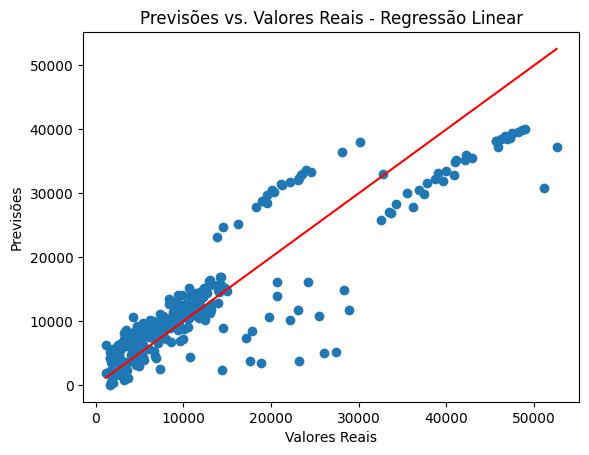

In [64]:
plt.scatter(Y_test, Y_pred_linear_regression)
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.title('Previsões vs. Valores Reais - Regressão Linear')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red')
plt.show()

## Árvore de Decisão

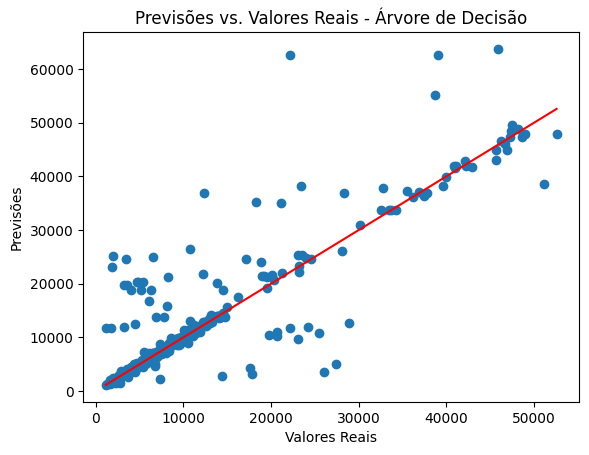

In [65]:
plt.scatter(Y_test, Y_pred_decision_tree)
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.title('Previsões vs. Valores Reais - Árvore de Decisão')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red')
plt.show()

## Random Forest

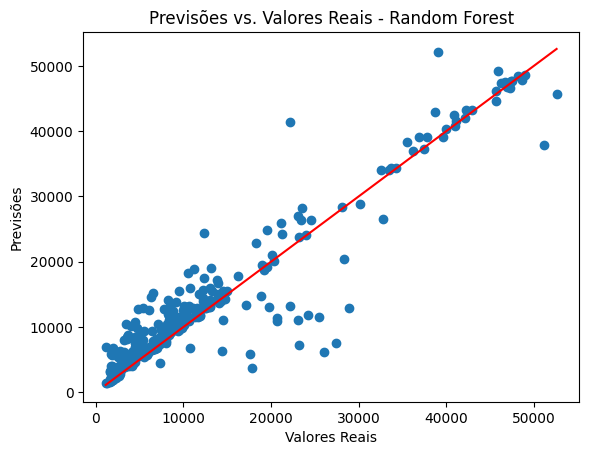

In [66]:
plt.scatter(Y_test, Y_pred_random_forest)
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.title('Previsões vs. Valores Reais - Random Forest')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red')
plt.show()

##  Support Vector Machines (SVM)

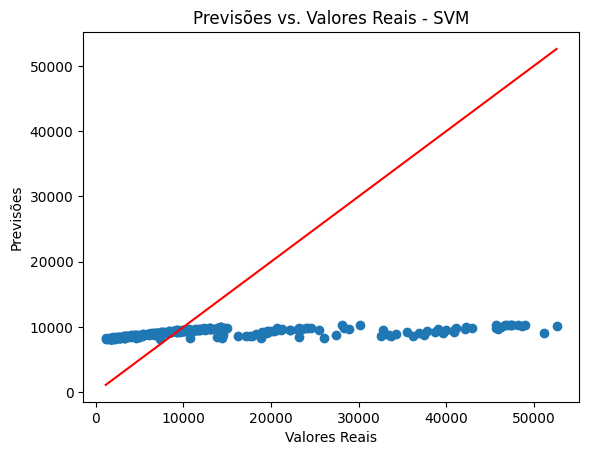

In [67]:
plt.scatter(Y_test, Y_pred_svm)
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.title('Previsões vs. Valores Reais - SVM')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red')
plt.show()

## Gradient Boost Machine

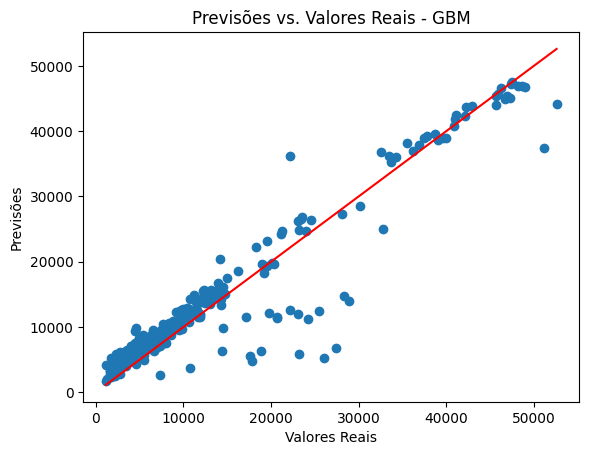

In [68]:
plt.scatter(Y_test, Y_pred_gbm)
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.title('Previsões vs. Valores Reais - GBM')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red')
plt.show()